***Auther : Hicran Arnold***

***MET CS 6999 Term Project***

***Title: Prediction Self Health Condition Using Machine Learning Algorithms - 2018 BRFSS Survey Data***


***Table Of Contents***

1. Introduction
2. Information About the Data
3. Summary of Data Preprocessing
4. Summary of Attribute Selection Methods
5. Summary of the Classifier Algorithms
6. Summary of 25 Models
7. Best Attribute Selection Method and the Classifier Algorithm
8. Model Comparisons
9. Five Relevant Attributes
10. Project Key Takeaways
11. Appendix List

## 1 Introduction 

The data has been retirived from CDC [2018 BRFSS Survey Data](https://www.cdc.gov/brfss/annual_data/annual_2018.html). There are total amount of 25 machine learning models.  
The target population (aged 18 years and older) for cellular telephone samples in 2018 consists of people residing in a private residence or college housing who have a working cellular telephone. The goal of this project assignment is to build and test classifier models using a real-world data.


## 2- Information About the Data

**Data Source** :  [CDC 2018 BRFSS Survey Data ](https://www.cdc.gov/brfss/annual_data/annual_2018.html)

**Data Size** : 11933 tuples(observations) and 108 attributes

**Target Attribute**: "havarth3" and its value is either 1 or 2. The value of 1 means that the person was ever told to have some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia. Otherwise, the value is 2.

## 3- Summary of Data Preprocessing

I used python and pandas library in my data cleaning process and one of the first things I had to do is changing the null value symbol("?") in the data to "nan". There are many built-in functions in pandas to deal with null values but if there is "?" then the library thinks that it is a mixed type of data. So my first step was to convert those data back to nulls so I can use pandas fillna() functions. Overall missing tuples were a very small portion of the data, only 1.24 percent. The second thing that I checked was how much of the data missing for each data point. After that, I proceed with filling null values and outlier treatment. I used the median value to fill the null values because the mean is very sensitive to outliers. 

## 4-Summary of Attribute Selection Methods

### 4.1 Information Gain/Mutual Info
I wanted to use this filtering feature selection method to pick attributes that has a higher information gain. 

selected column names :'x.age80', 'x.ageg5yr', 'x.age.g', 'employ1', 'diffwalk', 'x.hcvu651',
       'genhlth', 'x.age65yr', 'marital', 'x.phys14d', 'physhlth', 'rmvteth4',
       'pneuvac4', 'x.rfhlth', 'x.ststr', 'x.exteth3', 'persdoc2', 'qstver',
       'x.strwt', 'chccopd1'],
      dtype='object'

Note: I noticed that the age attributes has multiple columns with different range and maybe we need to eliminate duplicates and try this method again. 

### 4.2 Information Chi-square
In this method we check our categorical attributes to see if they are associated with our target attribute. It gives us the rate of importance. I dropped columns that are not important and picked the top columns that are most important. 

selected column names Index(['employ1', 'income2', 'weight2', 'height3', 'children', 'x.drnkdrv',
       'pneuvac4', 'alcday5', 'rmvteth4', 'x.psu', 'physhlth', 'menthlth',
       'genhlth', 'sleptim1', 'qstver', 'htin4', 'wtkg3', 'x.bmi5', 'htm4',
       'x.age.g', 'x.age80', 'x.ageg5yr', 'x.chldcnt', 'x.drnkwek', 'drocdy3.',
       'x.race', 'x.llcpwt2', 'x.llcpwt', 'x.dualuse', 'x.wt2rake', 'x.ststr',
       'x.strwt', 'x.rawrake', 'x.phys14d', 'x.hcvu651', 'x.prace1',
       'x.mrace1'],
      dtype='object')


### 4.3 Information Random Forest Classifier

This method is very similar to the first mutual info attribute selection method. 

selected column names Index(['employ1', 'income2', 'weight2', 'height3', 'pneuvac4', 'alcday5',
       'diffwalk', 'x.psu', 'physhlth', 'menthlth', 'genhlth', 'fmonth',
       'imonth', 'iday', 'sleptim1', 'qstver', 'htin4', 'wtkg3', 'x.bmi5',
       'htm4', 'x.age.g', 'x.age80', 'x.ageg5yr', 'x.age65yr', 'x.drnkwek',
       'drocdy3.', 'x.llcpwt2', 'x.llcpwt', 'x.wt2rake', 'x.ststr', 'x.strwt',
       'x.phys14d', 'x.state'],
      dtype='object')

I noticed it picked  days and months. Those columns are not seems relevant, we should remove them and rerun this method again.   

### 4.4 Forward Feature Selection

This method iteratively pairs and runs features starting from no features. The downside of this method is that it is very expensive. It takes a long time to compute. Therefore I selected small number of features to try this method. 

feature names Index(['x.aidtst3', 'employ1', 'income2', 'weight2', 'height3', 'children',
       'havarth3'],
      dtype='object')



### 4.5  Feature Drop and Manually Determining Irrelevant Attributes

In this method I used information gain attribute selection method attributes and run logistic regression algorithm. The goal is to see when we drop which attribute the method accuracy increased. So if the accuracy increases a lot then we should drop that feature. Also I noticed age attribute repeated a lot, so I eliminate that attribute to one attribute. 

features :(['havarth3', 'x.age80', 'diffwalk', 'employ1', 'genhlth', 'pneuvac4',
       'physhlth', 'x.hcvu651', 'x.rfhlth', 'x.phys14d', 'marital', 'rmvteth4',
       'x.exteth3', 'x.chldcnt', 'diabete3'],
      dtype='object')


## 5 Summary of the Classifier Algorithms

### 5.1 Classifier 1: Logistic Regression 

I wanted to use logistic regression to check the relationship between attributes and dependent (target) attribute. This is a linier model. I thought it would be nice to compare linier model with nonlinear models.

### 5.2 Classifier 2: Decision Tree  

I used Decision Tree Classifier. It is a non-linier model. It did  better than logistic regression in this data, especially with some certain feature pair where there is not clear linear separation

### 5.3 Classifier 3: K-Nearest Neighbors Algorithm (KNN)  

I wanted to include a classifier that looks for proximity similarity to make. This algorithm gave similar result to other algorithms and like to decision tree it did better than logistic regression  in some certain attributes selection pair. 

### 5.4 Classifier S:Support Vector Machine (SVM)
This algorithm works well with high dimensional spaces. I see that in my experiment. It did better than other algorithms in general.

### 5.5 neural network MLPClassifier
We learned about neural network recently and I wanted to use the multilayer perceptron (MLP) is a feedforward artificial neural network model to check to see how it is performing comparing to other models. 

## 6 Summary of 25 Models and key Takeaways

Most of the model's accuracy were around 70 to 75 percent. Most of the models performed similar but logistic regression in some cases did really bad. It did not learn and classified all of the data as negative. Rest of them gave very similar results. 
In real life is messy and big. There are a lot of steps that has to be taken in order to make that ready to analyze. Each steps effect your accuracy of the data. My biggest take away is that it is difficult to eliminate big number of features. Knowing the attributes meaning I think is important.I learned that building an accurate the machine learning model highly connected to feature selections. The accuracy score that I received for average models were about 70% but the sensitivity rate above 50%. Even that I thought my models are doing actually they were not. This shows that I need to clean the data again and balance. 

## 7 Best Attribute Selection Method and the Classifier Algorithm

***Best Attribute Selection Method***: Feature drop and manual elimination based on given info

***Classifier Algorithm***: KNN

***Selected Features :*** 'x.age80', 'employ1', 'diffwalk', 'x.hcvu651', 'genhlth', 'marital',
       'x.phys14d', 'physhlth', 'rmvteth4', 'pneuvac4', 'x.rfhlth',
       'x.exteth3', 'persdoc2', 'qstver', 'chccopd1'


In [54]:
import pandas as pd 
df  = pd.read_csv('HicranArnold_best_train.csv')
df2  = pd.read_csv('HicranArnold_best_test.csv')
df.head()

,x.age80,employ1,diffwalk,x.hcvu651,genhlth,marital,x.phys14d,physhlth,rmvteth4,pneuvac4,x.rfhlth,x.exteth3,persdoc2,qstver,chccopd1,havarth3
0,47,2.0,2.0,1,1,1.0,1,88,8,2.0,1,1,1.0,20,2,2
1,65,2.0,2.0,9,5,1.0,3,30,8,2.0,2,1,1.0,20,2,2
2,77,1.0,2.0,9,1,3.0,1,88,2,2.0,1,2,3.0,10,2,2
3,80,7.0,1.0,9,3,3.0,1,88,1,1.0,1,2,1.0,10,2,1
4,51,1.0,2.0,1,2,1.0,1,88,8,2.0,1,1,3.0,10,2,2


In [55]:
df2.head()

,x.age80,employ1,diffwalk,x.hcvu651,genhlth,marital,x.phys14d,physhlth,rmvteth4,pneuvac4,x.rfhlth,x.exteth3,persdoc2,qstver,chccopd1,havarth3
0,75,5.0,2.0,9,2,1.0,1,88,8,1.0,1,1,1.0,10,2,1
1,23,1.0,2.0,1,3,5.0,1,88,8,2.0,1,1,3.0,12,2,1
2,80,7.0,2.0,9,5,2.0,3,30,1,1.0,2,2,2.0,10,2,1
3,36,2.0,2.0,2,1,2.0,1,88,1,2.0,1,2,3.0,20,2,2
4,65,1.0,2.0,9,2,1.0,1,88,1,2.0,1,2,1.0,20,2,2


In [56]:
X_train = df.loc[ :,  ~df.columns.isin(['havarth3']) ]
y_train = df.loc[:, 'havarth3':'havarth3']

X_test = df2.loc[ :,  ~df2.columns.isin(['havarth3']) ]
y_test = df2.loc[:, 'havarth3':'havarth3']


In [57]:
from sklearn.neighbors import KNeighborsClassifier#clf3
#data transformation 
from sklearn import preprocessing
#accuracy measurement
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report
from sklearn import metrics
#data transformation 
from sklearn import preprocessing
import numpy as np
# plotting
import seaborn as sns

def kNNMaker(X_train,y_train,X_test):
    scaler =preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled= scaler.transform(X_test)
    m = KNeighborsClassifier(n_neighbors=9)
    m.fit(X_train_scaled, y_train.values.ravel())
    y_pred_knn= m.predict(X_test_scaled)
    return m , y_pred_knn

def printAccuracy(y_test, y_pred):
        print(y_pred)
        cm = confusion_matrix(y_test, y_pred)
        TP, FP, FN, TN = cm.ravel() 
        group_names = ["TP", "FP", "FN", "TN"]
        group_counts = ["{0:0.0f}".format(value) for value in
                        cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                                cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
                zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        sns.heatmap(cm, annot=labels, fmt='', cmap='mako')
        P = TP+FP
        N= FN+ TN
        TPR_log = TP/P
        TNR_log = TN /N 

        my_accuracy_score_log= accuracy_score(y_test, y_pred)
        my_matrix_values_1 = {"TN":TN, "FP":FP, "FN":FN, "TP":TP,"Accuracy":my_accuracy_score_log,
                        "Sensitivity: TPR":TPR_log,"Specificity: TNR":TNR_log}
        result_of_m = pd.DataFrame(my_matrix_values_1 , index=[0])
        print(result_of_m)
        #return my_accuracy_score_log
        print('Log loss = {:.5f}'.format(log_loss(y_test, y_pred)))
        print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_pred)))
        print('Average Precision = {:.5f}'.format(average_precision_score(y_test, y_pred)))
        print('\nUsing 0.5 as threshold:')
        print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred)))
        print('Precision = {:.5f}'.format(precision_score(y_test, y_pred)))
        print('Recall = {:.5f}'.format(recall_score(y_test, y_pred)))
        print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred)))
        print('\nClassification Report')
        print(classification_report(y_test, y_pred))
        print("Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.")
        return result_of_m


In [58]:
m3_knn, m3_y_pred_knn  = kNNMaker(X_train=X_train , y_train= y_train, X_test=X_test)

/home/harnold/github/CS_699_Data-Mining/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[2 2 1 ... 2 1 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2189  605  441  703  0.734383          0.537462          0.832319
Log loss = 11.47226
AUC = 0.68489
Average Precision = 0.27867

Using 0.5 as threshold:
Accuracy = 0.73438
Precision = 0.61451
Recall = 0.53746
F1 score = 0.57341

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.54      0.57      1308
           2       0.78      0.83      0.81      2630

    accuracy                           0.73      3938
   macro avg       0.70      0.68      0.69      3938
weighted avg       0.73      0.73      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


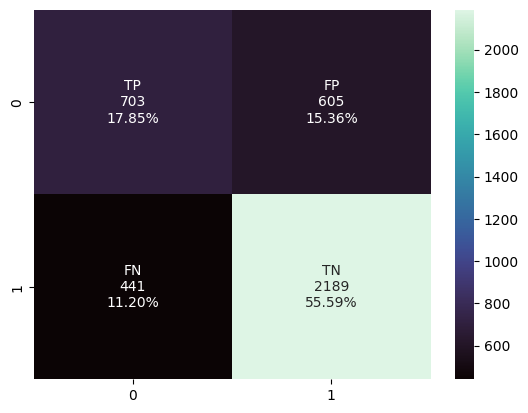

In [59]:
m3_knn_result = printAccuracy(y_test, m3_y_pred_knn)

## 8. Model Comparisons

I evaluate my model based on the criteria below. The goal of this project to predict 
* accuracy : In general this gives us how over all our project did. 
* error_rate : this tell us what percentage the model did make mistakes

I checked the above metrics but the goal of this project is to predict people with listed illnesses. So I picked the model with the highest sensitivity and precision because we want to know how precise our data identify the person with the illness   


* sensitivity_recall
* precision_rate

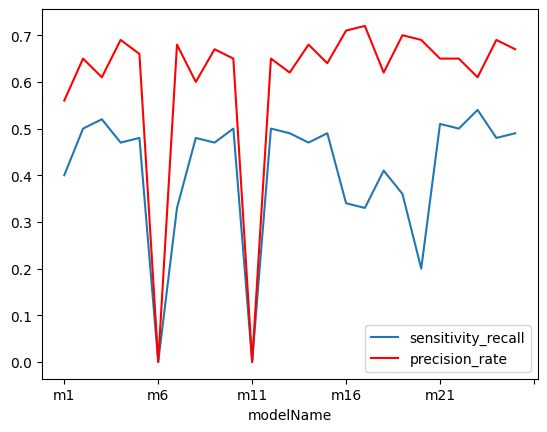

In [60]:
from IPython.display import Image
Image(filename="modelcomp.png")

## 9  Five Relevant Attribute

Below are the five attributes I think are the most relevant. These attributes has been repeatedly selected in attribute selection methods that are relevant and they got highest associate rate and my model accuracy went down when I dropped them in the feature selection method. 

1. Age 
2. physhlth
3. diffwalk
4. employ1
5. HCVU651

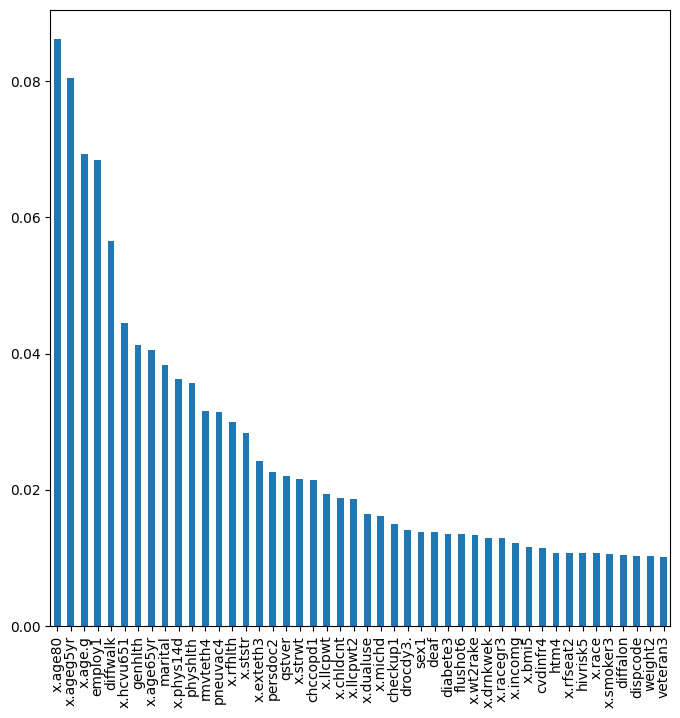

In [61]:

from IPython.display import Image
Image(filename="bestFeatures.png")

## 10  Project Key Takeaways

My take away from this project is that
-  Data prep processing, selecting attributes and models, all those steps  are all related ,and each steps performance has effect on the next step. 
-   Now I understand now that in order to know if a model is performing well you need to compare it with alternatives. You can see the areas that the model is not doing well clearly. 
-  The real world data is big and messy and making sense of big data is not easy. It is my first project where I had to work with these big of data with this many attributes. I ran out time but I am hoping that I would gain the speed with time. 

## 11 Appendix List

I have inculuded the files below

- HicranArnold_project_data_prep.ipynb (Providing the details of data cleaning)
- HicranArnold_project_data_process.ipynb and pdf (Providing the details of each attribute selections and model performance for each iterations, model comparison details)
- Initial and Best feature datasets 
- modelcomp.png and bestFeatures.png for the report presentation 